In [149]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore') 

train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
# train['label'] = 0
# test['label'] = 1

In [147]:
test

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0
...,...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,2246.0,64.96,3.25,7
7385,1.48,39.63,0.7,19.19,1570.0,57.44,2.87,7
7386,1.56,40.61,0.7,20.15,1649.0,58.32,2.92,7
7387,1.59,40.99,0.7,20.52,1679.0,58.66,2.93,7


In [172]:
train.corr()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
air_inflow,1.000000,0.636467,NaN,0.994585,0.549101,0.659138,0.347755,0.169851
air_end_temp,0.636467,1.000000,NaN,0.703042,0.990302,0.999506,0.273699,0.034830
out_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor_current,0.994585,0.703042,NaN,1.000000,0.619536,0.723685,0.353014,0.160190
motor_rpm,0.549101,0.990302,NaN,0.619536,1.000000,0.986419,0.237544,-0.015008
motor_temp,0.659138,0.999506,NaN,0.723685,0.986419,1.000000,0.282746,0.040964
motor_vibe,0.347755,0.273699,NaN,0.353014,0.237544,0.282746,1.000000,-0.023323
type,0.169851,0.034830,NaN,0.160190,-0.015008,0.040964,-0.023323,1.000000


# 모터온도와 배출온도

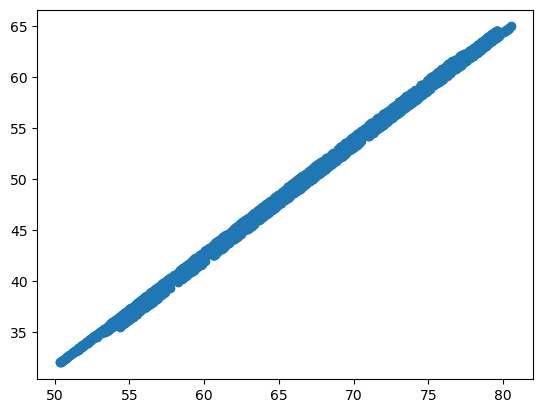

In [175]:
plt.scatter(train.motor_temp,train.air_end_temp)

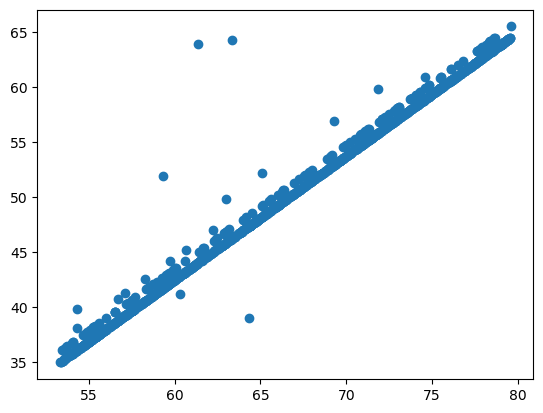

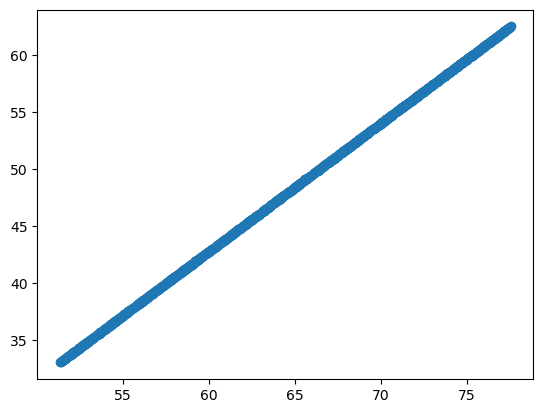

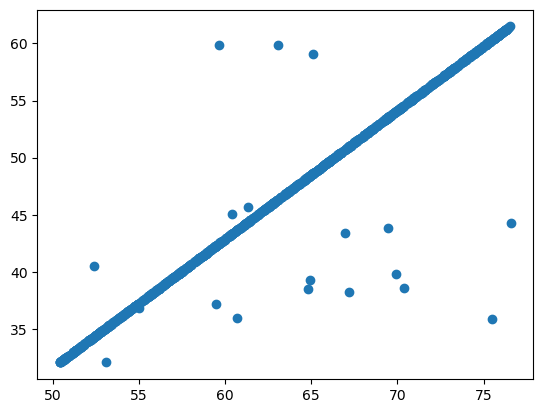

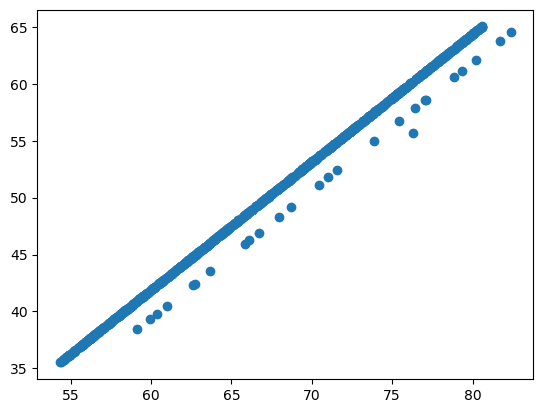

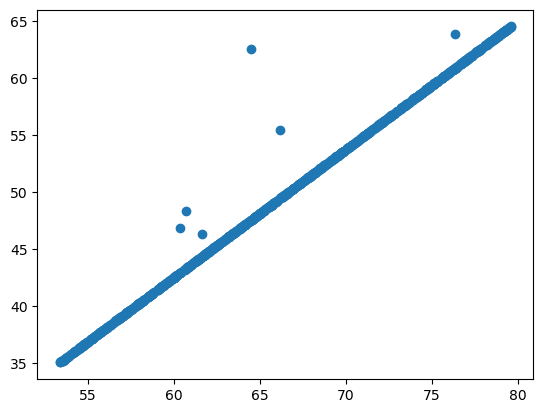

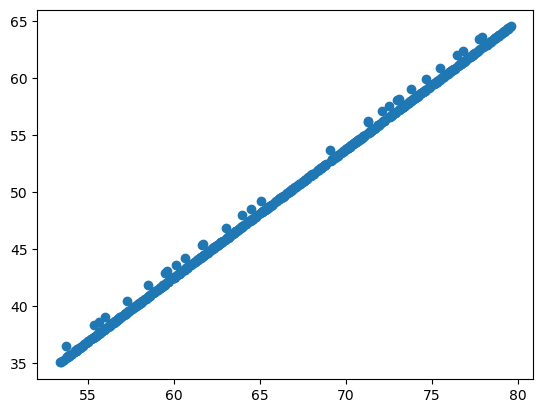

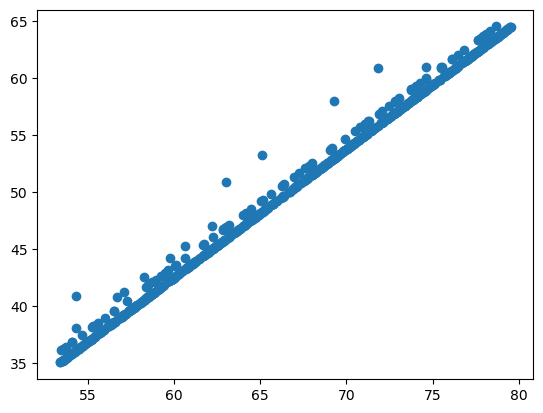

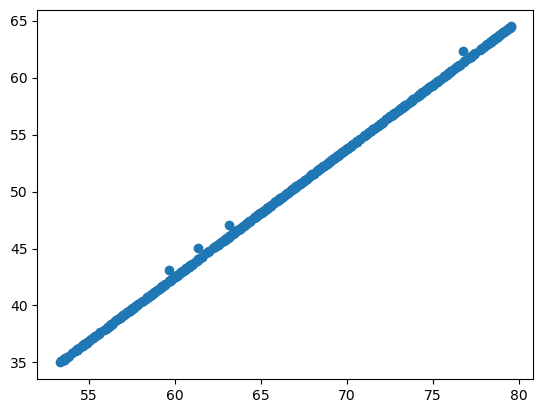

In [180]:
for i in range(8):
    plt.scatter(test[test.type == i].motor_temp,test[test.type == i].air_end_temp)
    plt.show()

# 모터전류와 온도

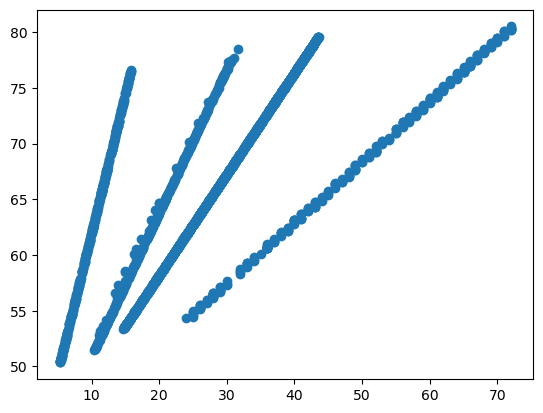

In [151]:
plt.scatter(train.motor_current,train.motor_temp)

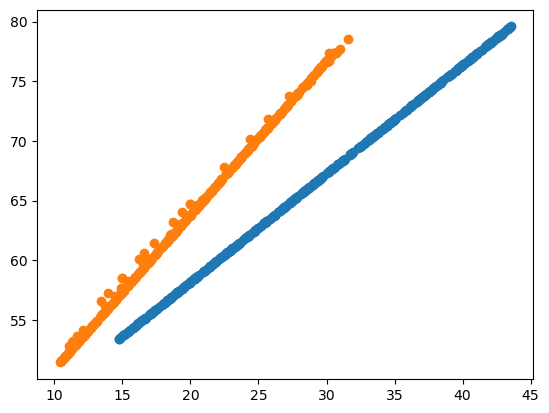

In [160]:
plt.scatter(train[train.type == 0].motor_current,train[train.type == 0].motor_temp)
plt.scatter(train[train.type == 1].motor_current,train[train.type == 1].motor_temp)

# 전류와 모터알피엠

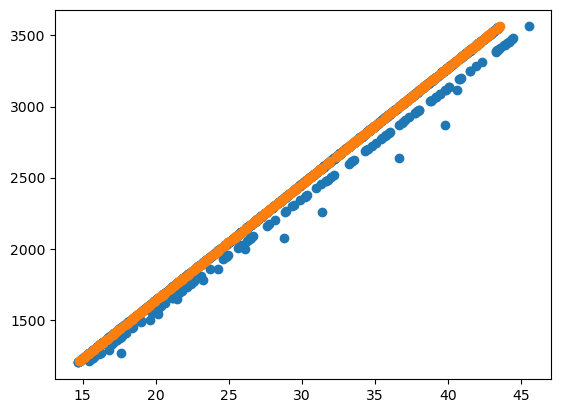

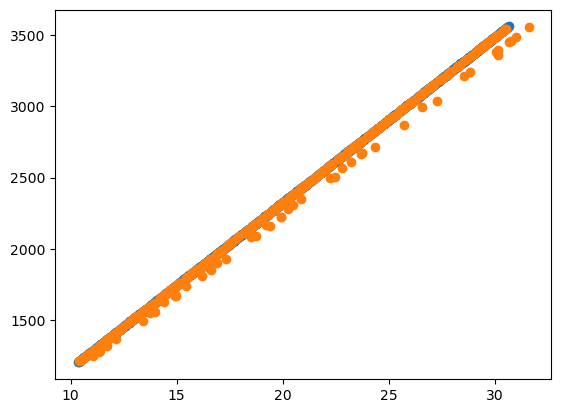

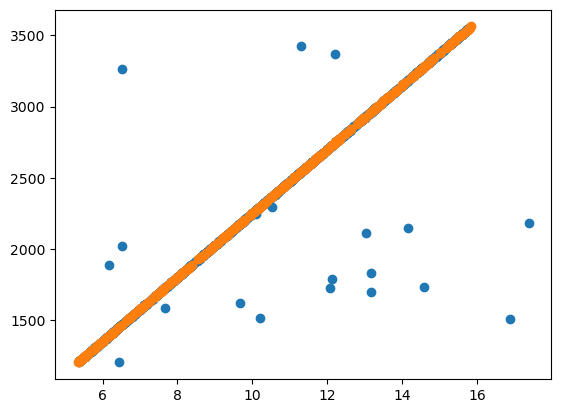

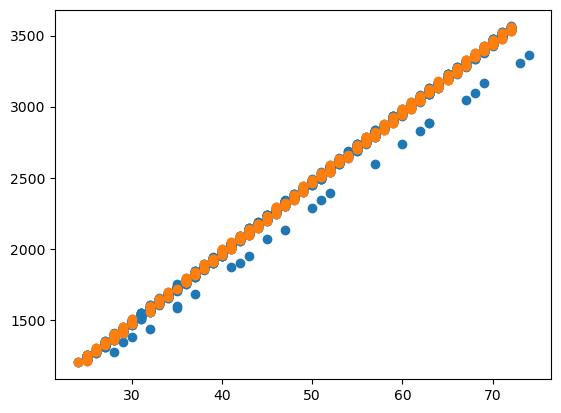

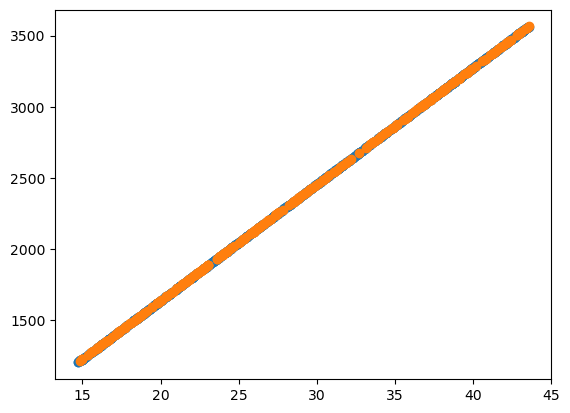

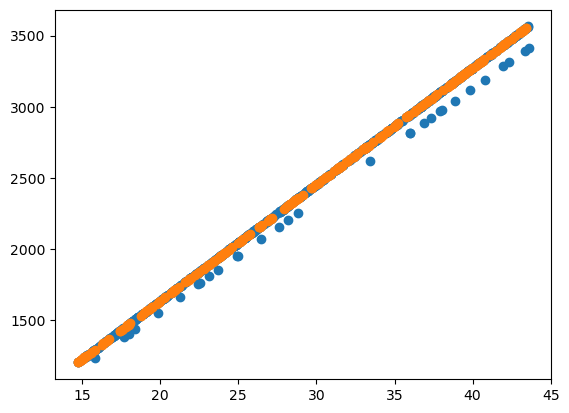

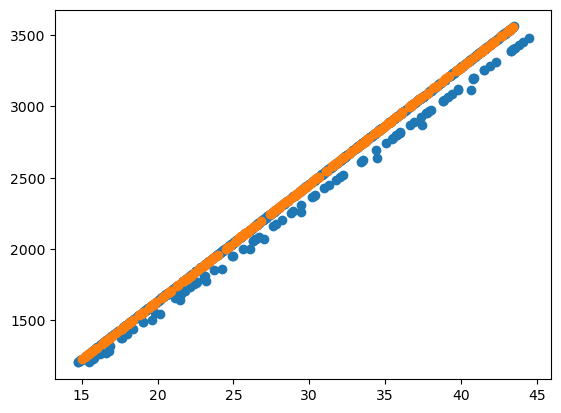

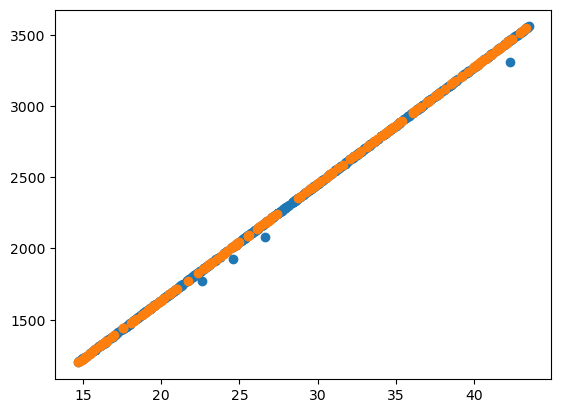

In [170]:
for i in range(8):
    plt.scatter(test[test.type == i].motor_current,test[test.type == i].motor_rpm)
    plt.scatter(train[train.type == i].motor_current,train[train.type == i].motor_rpm)
    plt.show()

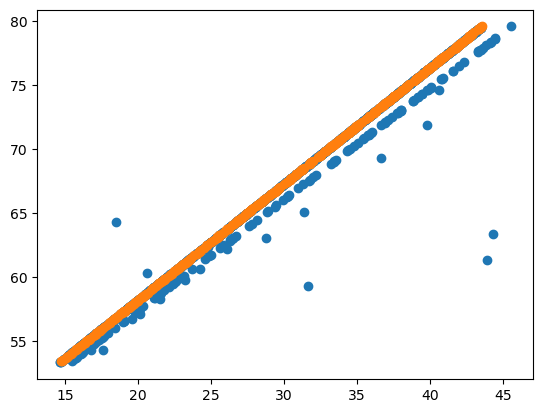

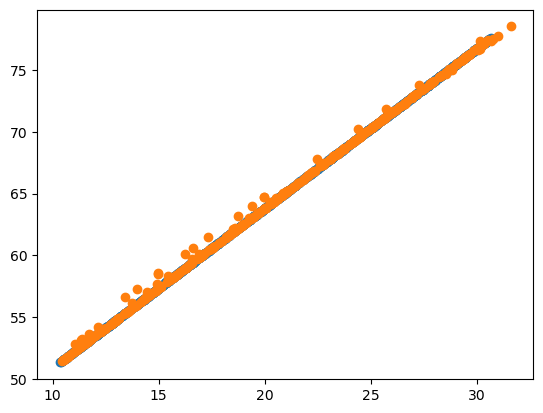

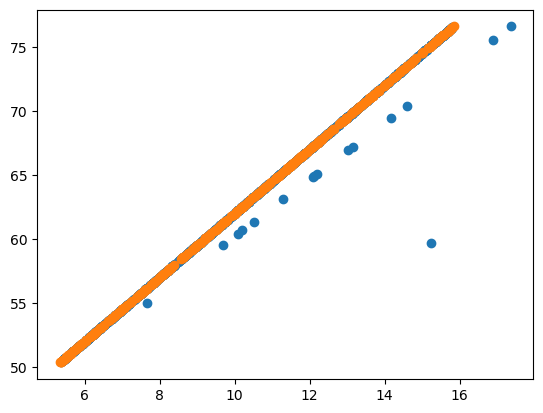

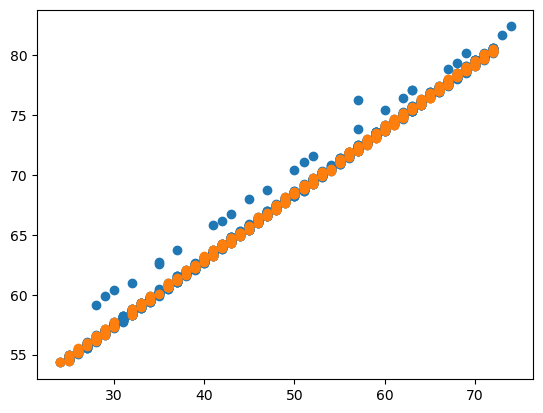

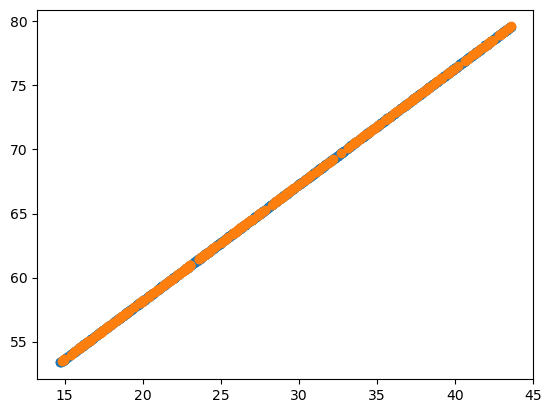

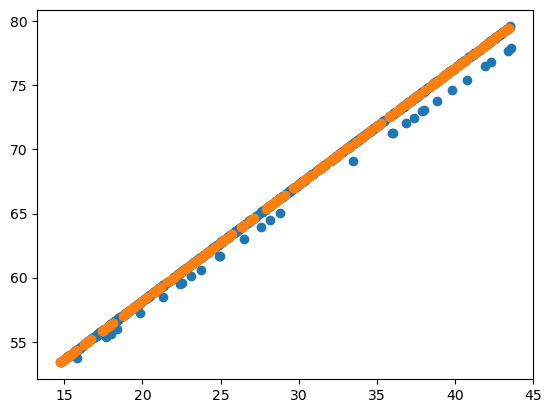

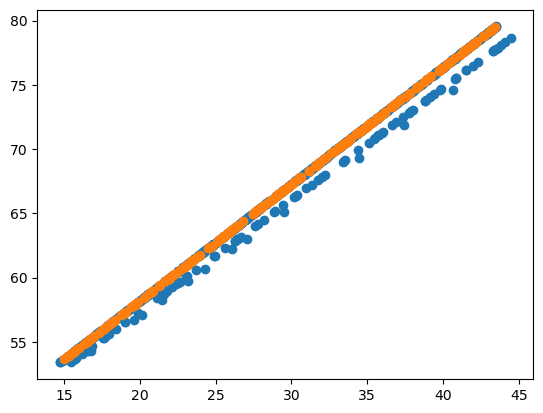

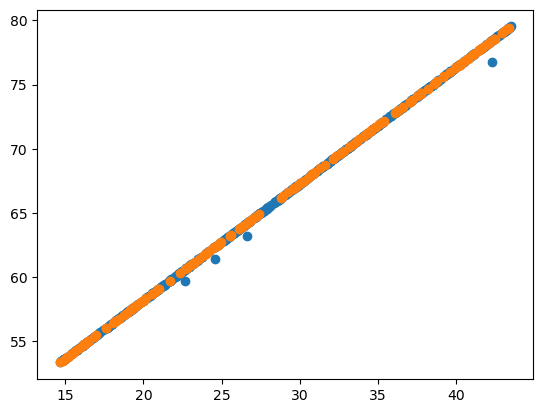

In [169]:
for i in range(8):
    plt.scatter(test[test.type == i].motor_current,test[test.type == i].motor_temp)
    plt.scatter(train[train.type == i].motor_current,train[train.type == i].motor_temp)
    plt.show()

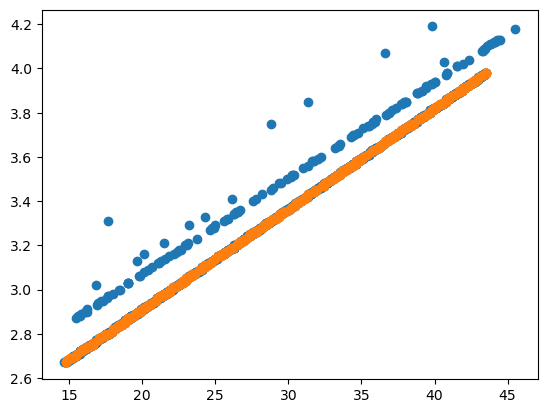

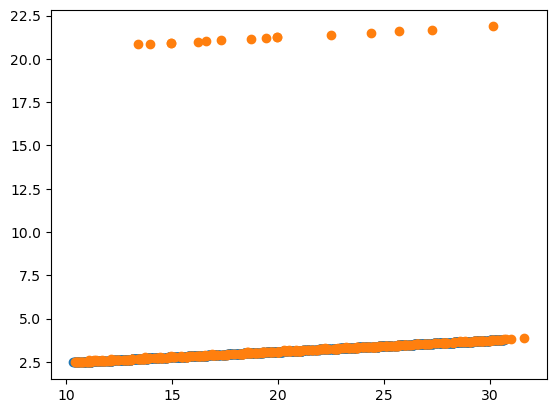

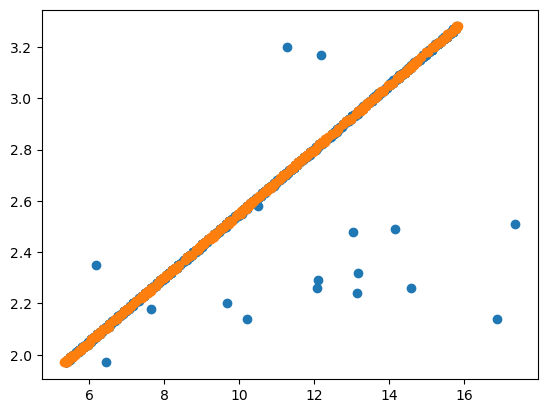

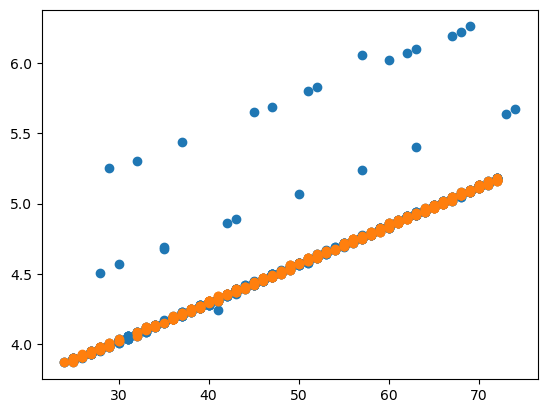

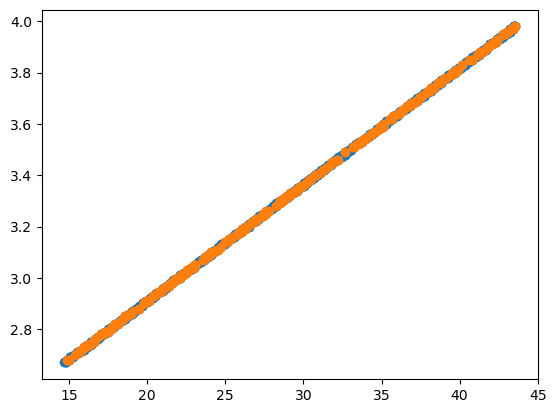

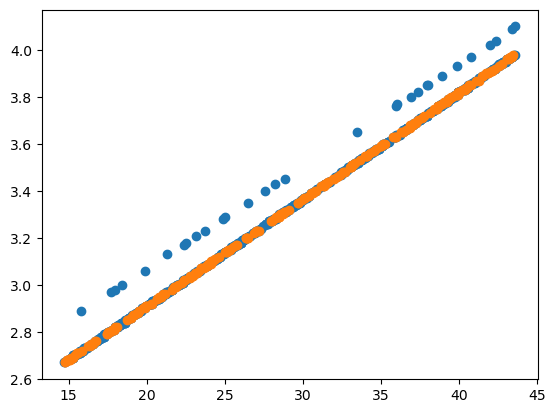

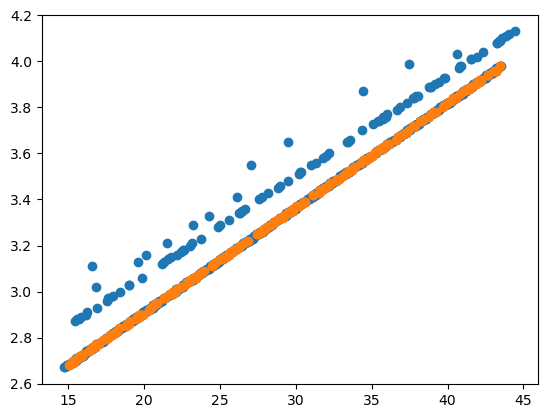

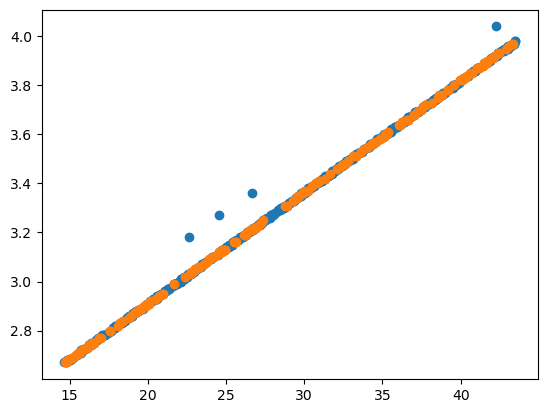

In [168]:
for i in range(8):
    plt.scatter(test[test.type == i].motor_current,test[test.type == i].motor_vibe)
    plt.scatter(train[train.type == i].motor_current,train[train.type == i].motor_vibe)
    plt.show()

<AxesSubplot:ylabel='Frequency'>

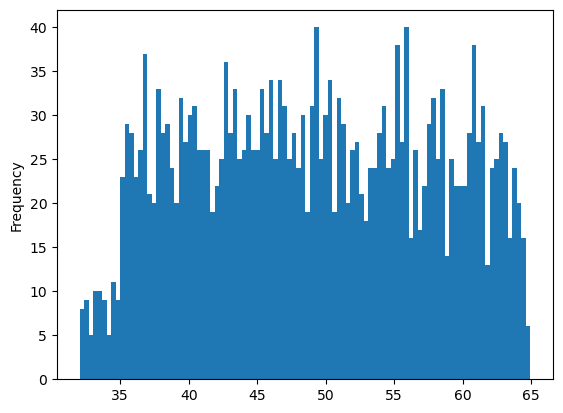

In [24]:
train.air_end_temp.plot.hist(bins=100)

In [ ]:
std = StandardScaler()
standard_target = []
for i in range(3):
    std.fit(np.array(train[train.type == i].air_end_temp).reshape(-1,1))
    standard_target.append(std.transform(np.array(test[test.type == i].air_end_temp).reshape(-1,1)))

In [102]:
std.transform(np.array(test[i]).reshape(-1,1))

array([[ 0.42088566],
       [ 0.64917183],
       [-0.80488189],
       ...,
       [-1.05207167],
       [-1.0084498 ],
       [-0.83105544]])

In [103]:
from sklearn.decomposition import PCA
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
pca = PCA(n_components=3)
pca.fit(train)
pca.explained_variance_ratio_

train = pd.DataFrame(pca.transform(train))
test = pd.DataFrame(pca.transform(test))

# test = [test[test['type'] == i] for i in range(8)]
# for i in test:
#     temp = pca.transform(i.loc[:,cols])
#     temp = pd.DataFrame(temp)

std = StandardScaler()
standard_target = []
for i in range(3):
    std.fit(np.array(train[i]).reshape(-1,1))
    standard_target.append(std.transform(np.array(test[i]).reshape(-1,1)))

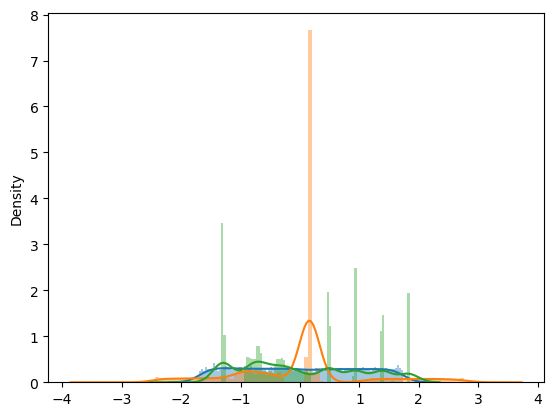

In [104]:
for i in standard_target:
    sns.distplot(i,bins=100)

In [120]:
test[0] = std.fit_transform(np.array(test[0]).reshape(-1,1))
test[1] = std.fit_transform(np.array(test[1]).reshape(-1,1))
test[2] = std.fit_transform(np.array(test[2]).reshape(-1,1))

In [126]:
test

,0,1,2
0,0.419109,0.143417,-1.308781
1,0.647412,0.141911,-1.306436
2,-0.806746,0.146349,-1.322419
3,-0.060763,0.144151,-1.314461
4,-0.278886,0.145085,-1.316594
...,...,...,...
7384,-0.185821,0.175007,1.824512
7385,-1.168831,0.177937,1.813344
7386,-1.053953,0.177125,1.814219
7387,-1.010328,0.177398,1.815428


In [144]:
test[(test[1] > 2.25)]

,0,1,2
3503,1.254297,2.593623,-0.705134
3505,0.967799,2.448686,-0.661942
3507,1.654220,2.742997,-0.748543
3509,1.254297,2.593623,-0.705134
3510,1.377900,2.590276,-0.703334
...,...,...,...
4404,1.113229,2.519446,-0.682744
4408,0.899446,2.409860,-0.650653
4411,1.370630,2.595750,-0.704911
4414,0.695841,2.292550,-0.615144


In [143]:
test[(test[1] < -2.25)]

,0,1,2
2405,1.661819,-2.410683,0.143962
2412,1.687992,-2.423563,0.148585
2414,1.635647,-2.397803,0.139878
2426,1.564400,-2.362917,0.127652
2441,1.421906,-2.292385,0.103737
...,...,...,...
3483,1.395734,-2.279420,0.099617
3490,1.375378,-2.269250,0.096275
3491,1.430630,-2.297199,0.105498
3494,1.557130,-2.359162,0.126548


<AxesSubplot:xlabel='1', ylabel='Density'>

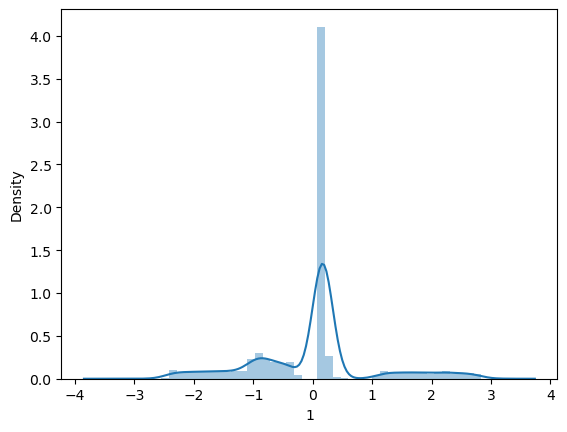

In [130]:
sns.distplot(test[1])

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train)
pca.explained_variance_ratio_

array([9.99735043e-01, 2.48587825e-04])

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.DataFrame(pca.transform(train))
test = pd.DataFrame(pca.transform(test))

In [4]:
cols = ['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type']

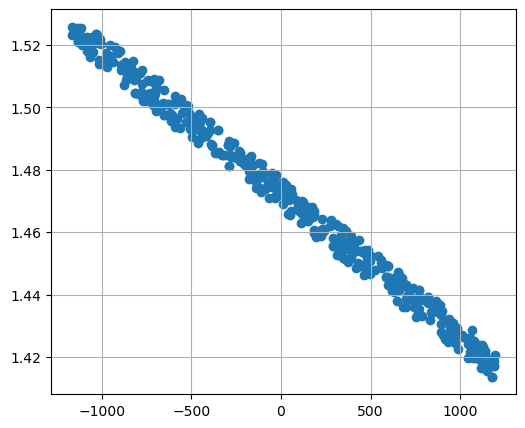

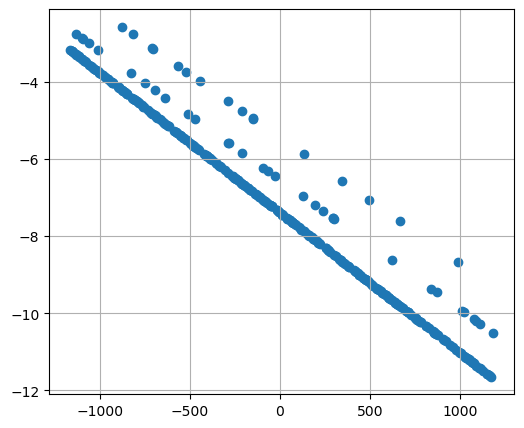

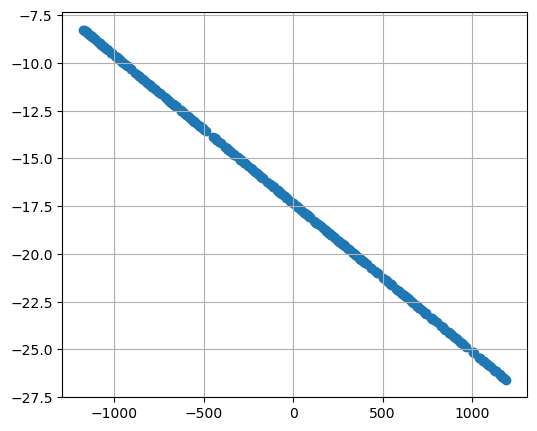

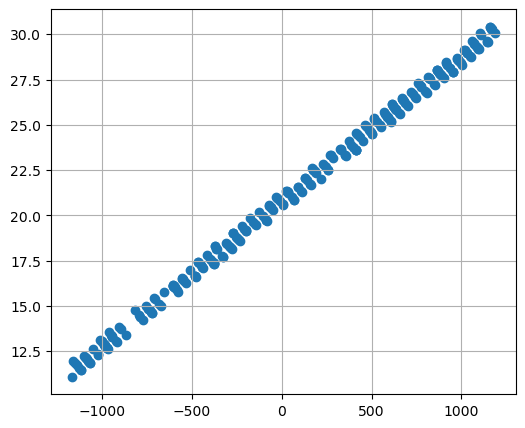

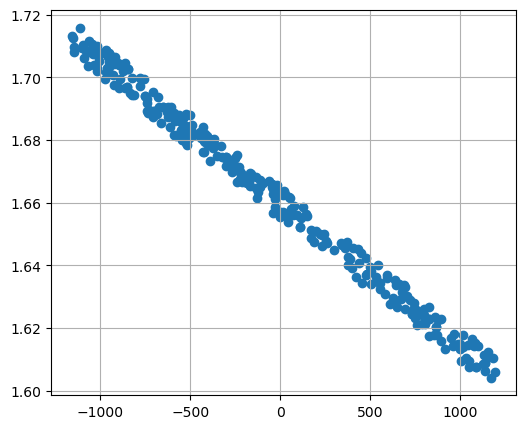

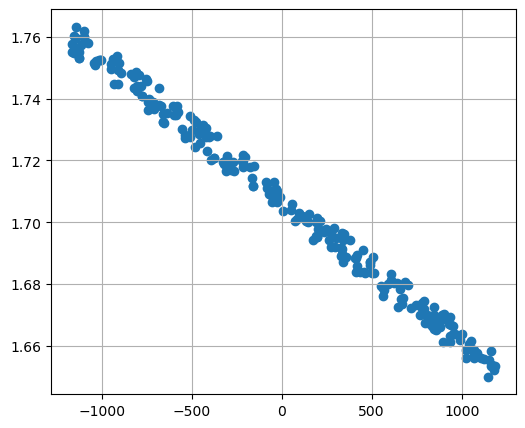

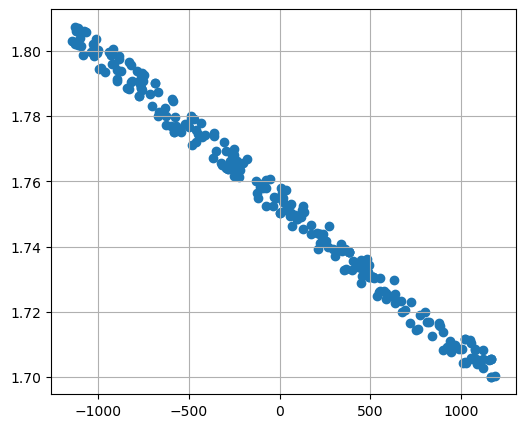

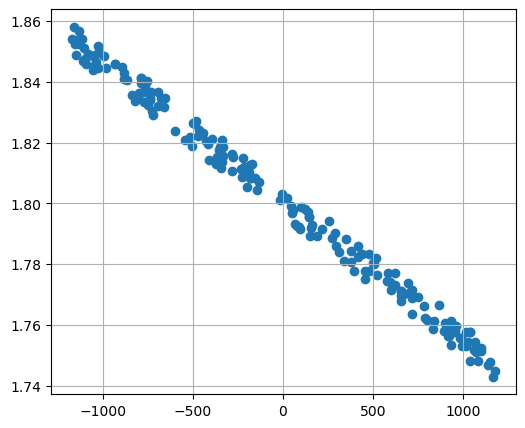

In [9]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
# train['label'] = 0
# test['label'] = 1
train = [train[train['type'] == i] for i in range(8)]
for i in train:
    temp = pca.transform(i.loc[:,cols])
    temp = pd.DataFrame(temp)

    fig = plt.figure(figsize=(6,5))
    # ax = fig.add_subplot(projection='3d')
    plt.scatter(temp[0],temp[1])
    plt.grid()
    fig.show()

In [6]:
from sklearn.decomposition import PCA
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
pca = PCA(n_components=3)
pca.fit(train)
pca.explained_variance_ratio_

array([9.99735043e-01, 2.48587825e-04, 1.02401476e-05])

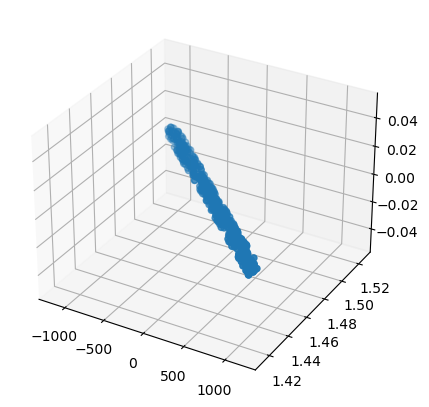

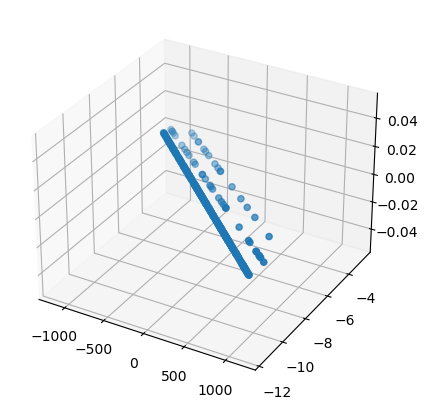

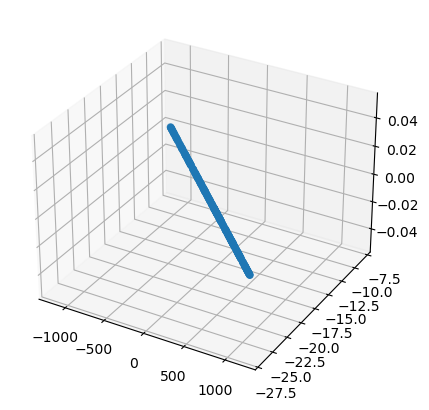

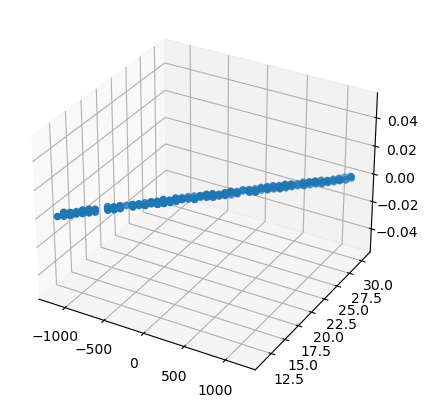

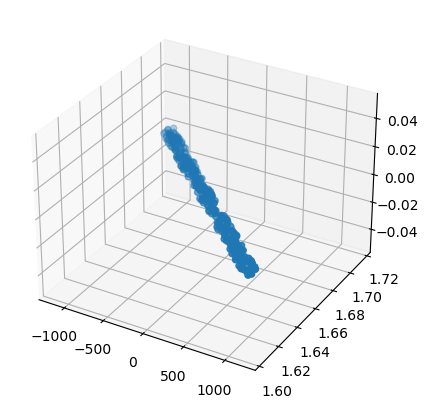

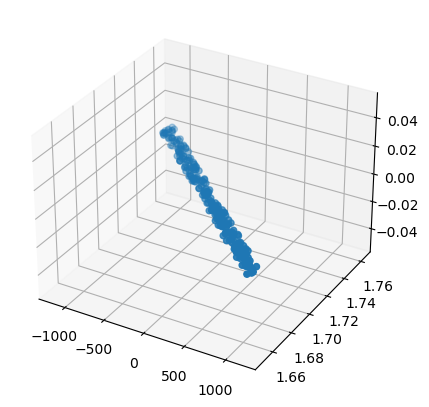

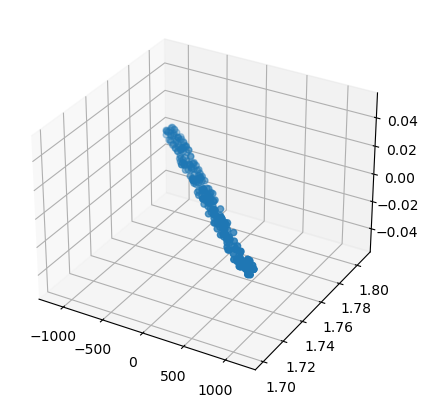

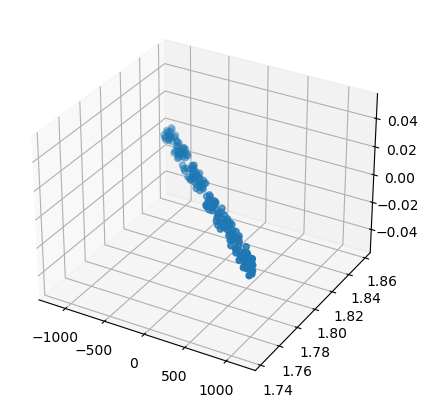

In [7]:
# train['label'] = 0
# test['label'] = 1
train = [train[train['type'] == i] for i in range(8)]
for i in train:
    temp = pca.transform(i.loc[:,cols])
    temp = pd.DataFrame(temp)

    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(temp[0],temp[1])
    fig.show()

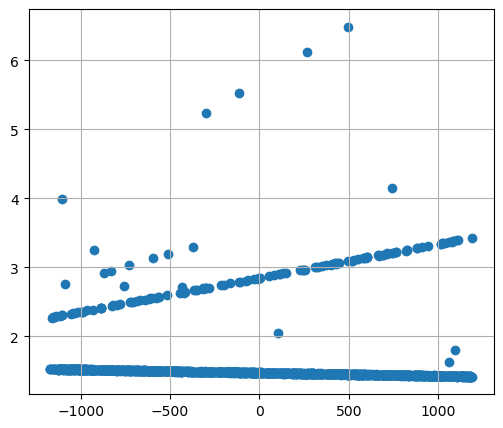

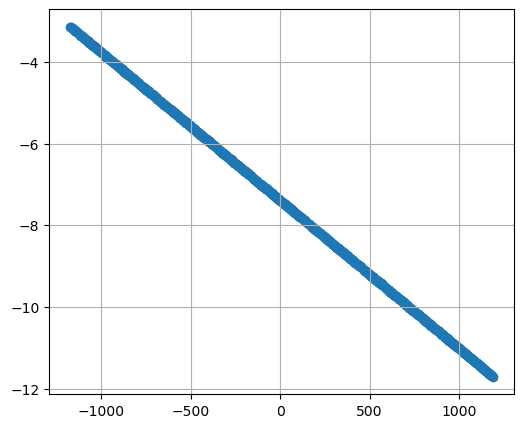

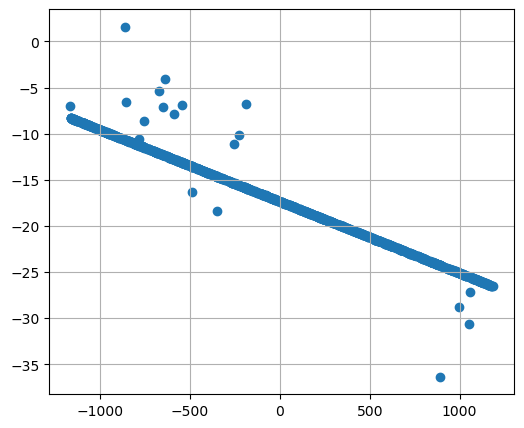

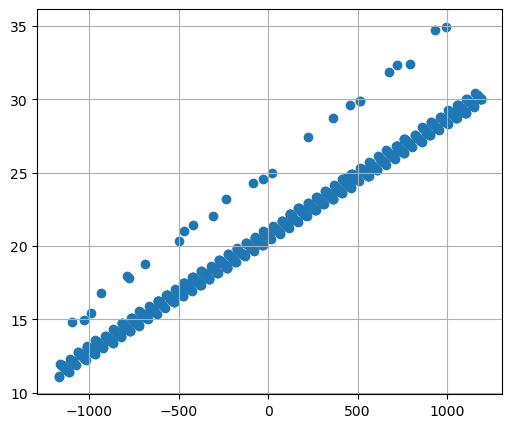

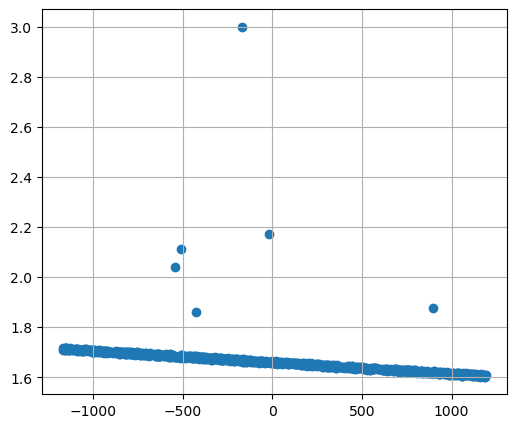

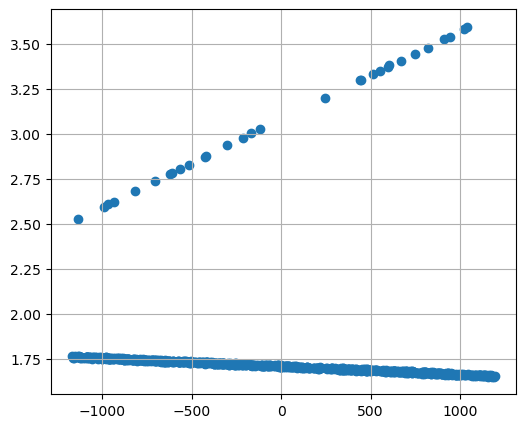

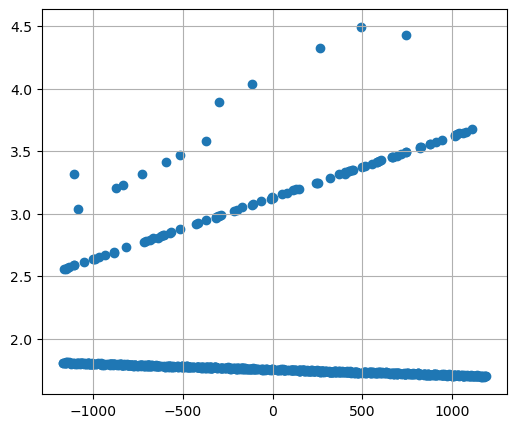

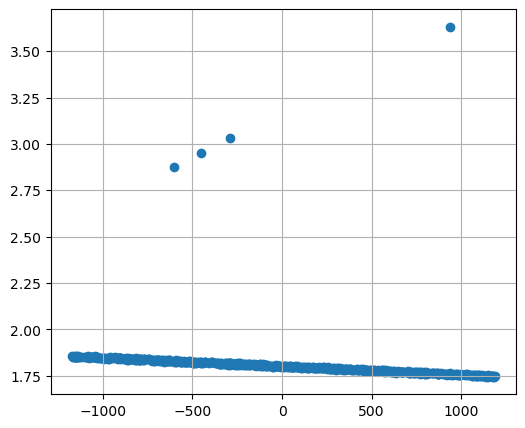

In [10]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
# train['label'] = 0
# test['label'] = 1
test = [test[test['type'] == i] for i in range(8)]
for i in test:
    temp = pca.transform(i.loc[:,cols])
    temp = pd.DataFrame(temp)

    fig = plt.figure(figsize=(6,5))
    # ax = fig.add_subplot(projection='3d')
    plt.scatter(temp[0],temp[1])
    plt.grid()
    fig.show()

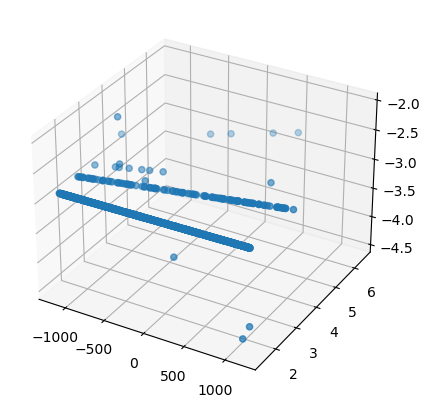

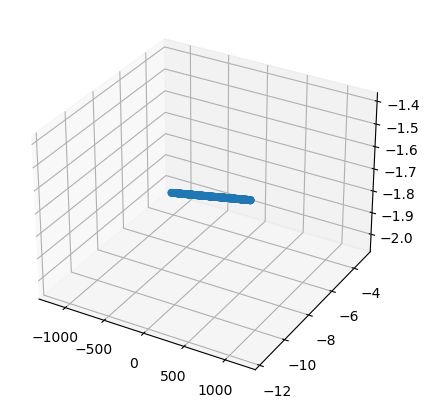

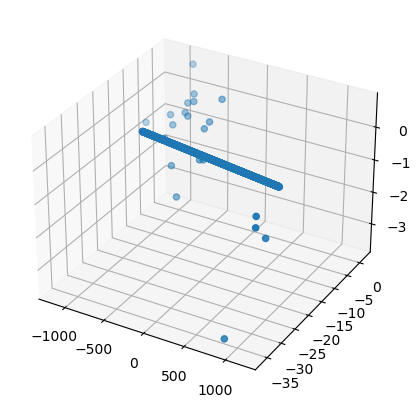

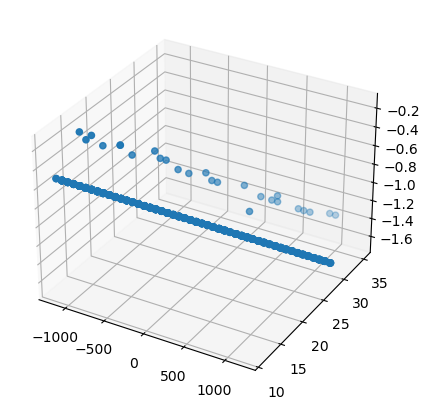

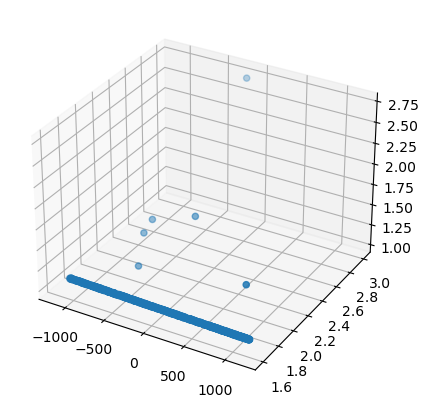

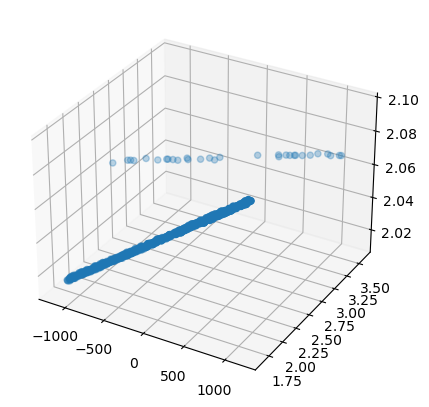

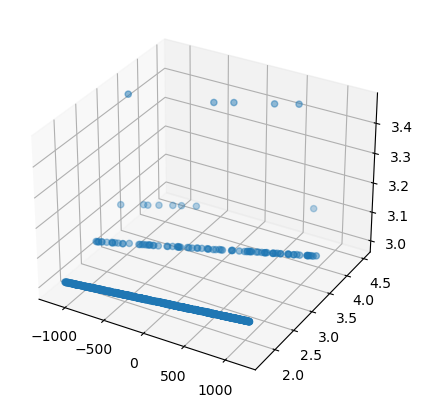

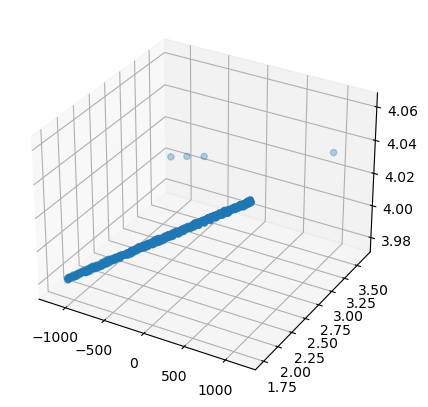

In [8]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
# train['label'] = 0
# test['label'] = 1
test = [test[test['type'] == i] for i in range(8)]
for i in test:
    temp = pca.transform(i.loc[:,cols])
    temp = pd.DataFrame(temp)

    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(temp[0],temp[1],temp[2])
    fig.show()

<AxesSubplot:xlabel='air_inflow', ylabel='Density'>

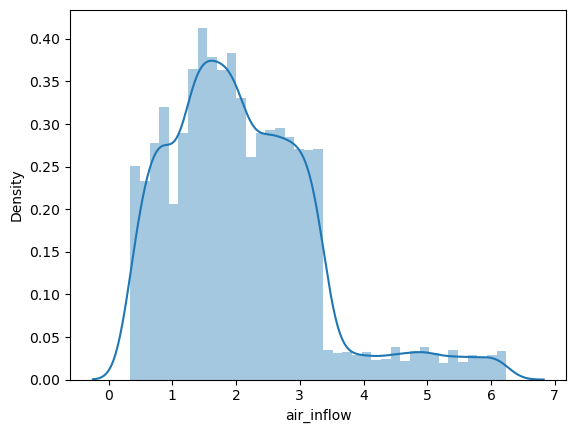

In [231]:
sns.distplot(test.air_inflow)

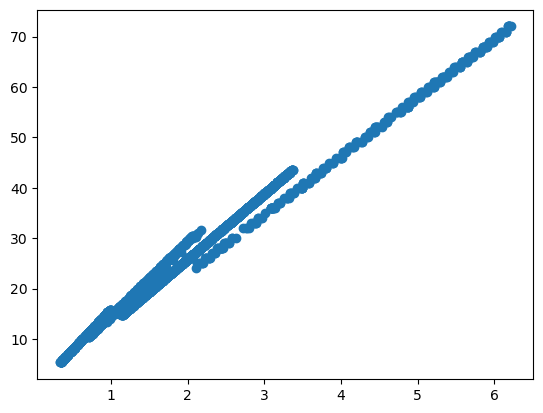

In [233]:
plt.scatter(train.air_inflow,train.motor_current)

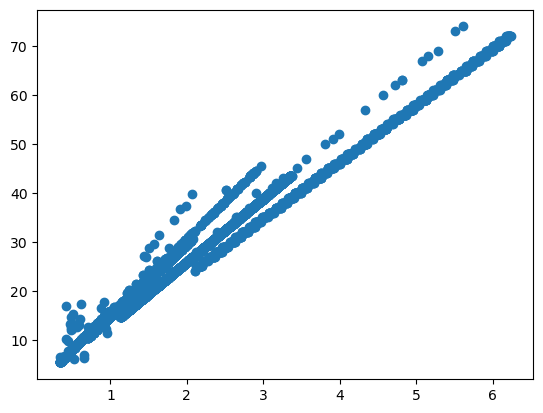

In [232]:
plt.scatter(test.air_inflow,test.motor_current)

# inference

- 타입별 선형회귀
- 시나리오별(엔드스팀, 전류, 온도 등...)

In [184]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train.drop('air_end_temp',axis=1),train['air_end_temp'])
linear.predict(test.drop('air_end_temp',axis=1))

array([53.23762118, 55.19315157, 42.69057425, ..., 40.6037689 ,
       40.98451563, 42.5084311 ])

In [227]:
tp = []
for i in list(test['air_end_temp'] - linear.predict(test.drop('air_end_temp',axis=1))):
    if abs(i) > 0.285:
        tp.append(1)
    else:
        tp.append(0)

In [228]:
for i in test[test.out_pressure != 0.7].index:
    tp[i] = 1

In [229]:
sum(tp)

364

In [211]:
ans_sample = pd.read_csv('./answer_sample.csv')
ans_sample['label'] = tp
ans_sample.set_index('type',inplace=True)
ans_sample.to_csv('./answer_sample.csv')
